#### PREPARE
modules import, clean data import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [3]:
df = pd.read_csv('../boston_clean.csv')

# BIVARIATE

## Continent x Age

In [6]:
df_continent_age = df[['Continent', 'Age']]

In [7]:
continent_age = df_continent_age.groupby(by='Continent')['Age'].agg(
    min_age='min',
    max_age='max',
    mean_age='mean',
    median_age='median')
continent_age

,min_age,max_age,mean_age,median_age
Continent,,,,
Africa,19,64,39.503546,37.0
Asia,19,81,48.676072,48.0
Europe,19,78,45.880418,46.0
North America,18,84,41.999944,42.0
Oceania,22,72,45.050542,45.0
South America,20,77,44.513903,44.0


In [8]:
continent_age_count = pd.crosstab(df_continent_age['Continent'], df_continent_age['Age'])
continent_age_count

Age,18,19,20,21,22,23,24,25,26,27,...,75,76,77,78,79,80,81,82,83,84
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,0,1,1,1,0,4,4,3,2,4,...,0,0,0,0,0,0,0,0,0,0
Asia,0,1,0,1,3,3,6,7,5,7,...,4,3,3,2,2,3,1,0,0,0
Europe,0,1,1,7,5,10,12,19,28,34,...,2,4,1,1,0,0,0,0,0,0
North America,62,134,261,480,692,899,1276,1502,1667,1700,...,32,21,14,12,5,9,4,4,3,1
Oceania,0,0,0,0,1,1,1,4,3,5,...,0,0,0,0,0,0,0,0,0,0
South America,0,0,1,0,0,3,2,4,4,5,...,1,1,1,0,0,0,0,0,0,0


### visualization

In [10]:
continent_age_count = continent_age_count.replace(0, np.nan)

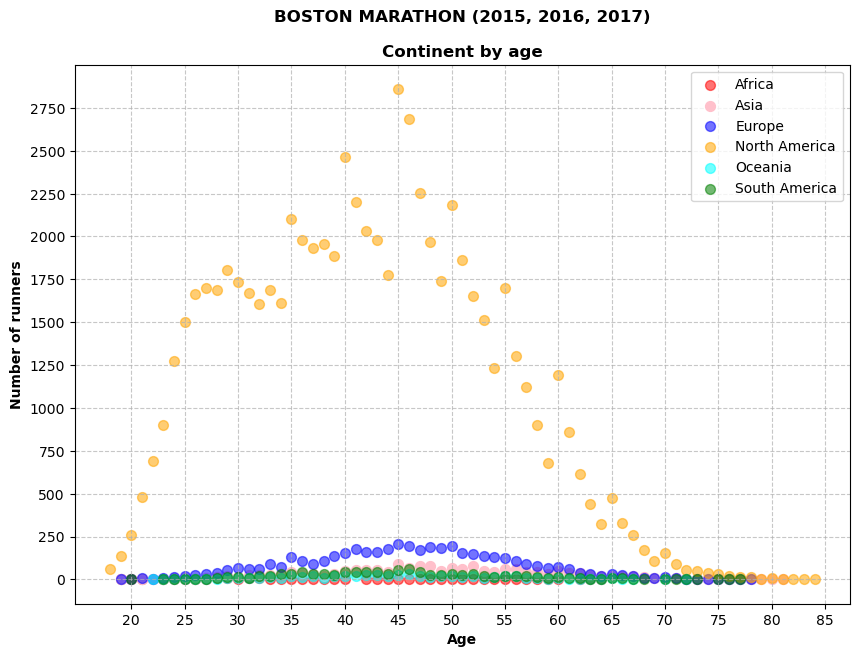

In [11]:
plt.figure(figsize=(10,7))
x = continent_age_count
colors = ['red', 'pink', 'blue', 'orange', 'cyan', 'green']
idx = 0
for i in x.index:
    plt.scatter(x.columns, x.loc[i], label=i, color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55, s=50)
    idx += 1

plt.legend()
plt.xticks(np.arange(20,86,5))
plt.yticks(np.arange(0,3000,250))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by age', fontweight='bold')

plt.savefig("../vexport/continentxage.png", dpi=300, bbox_inches='tight')
plt.show()

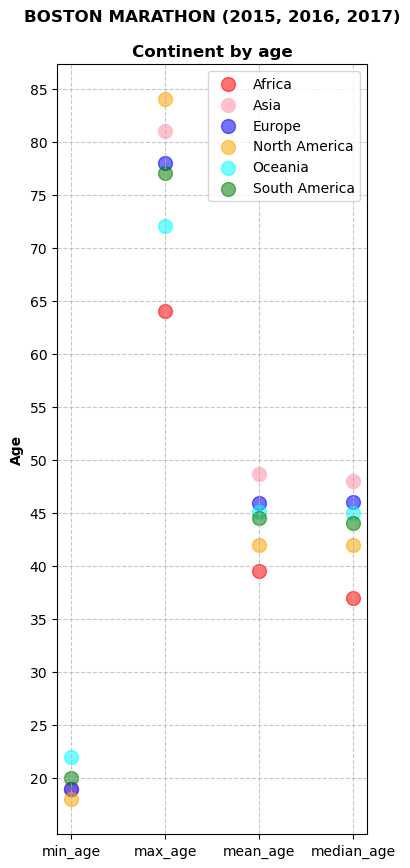

In [12]:
plt.figure(figsize=(4,10))
x = continent_age
colors = ['red', 'pink', 'blue', 'orange', 'cyan', 'green']
idx = 0
for i in x.index:
    plt.scatter(x.columns, x.loc[i], label=i, color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55, s=100)
    idx += 1

plt.legend()
# plt.xticks(np.arange(20,86,5))
plt.yticks(np.arange(20,x['max_age'].max()+2,5))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('', fontweight='bold')
plt.ylabel('Age', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by age', fontweight='bold')

plt.savefig("../vexport/continentxage_avg.png", dpi=300, bbox_inches='tight')
plt.show()

### visualization without North America

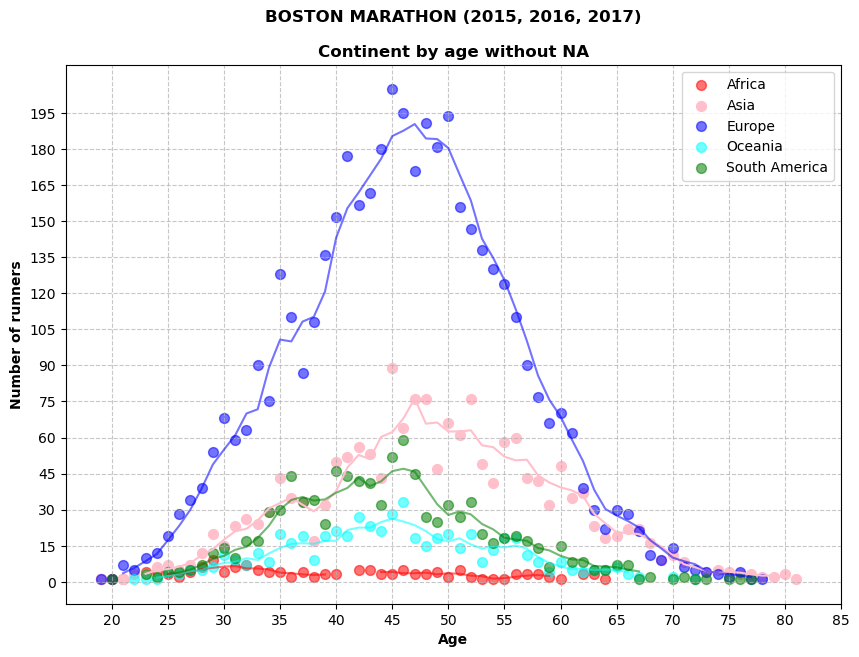

In [14]:
plt.figure(figsize=(10,7))
x = continent_age_count.drop('North America')
colors = ['red', 'pink', 'blue', 'cyan', 'green']

idx = 0
for i in x.index:
    plt.scatter(x.columns, x.loc[i], label=i, color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55, s=50)
    idx += 1
    
idx = 0
for i in x.index:
    plt.plot(x.columns, x.loc[i].rolling(window=4, center=True).mean(), color=colors[idx], alpha=1 if colors[idx] == 'pink' else 0.55)
    idx += 1

plt.legend()
plt.xticks(np.arange(20,86,5))
plt.yticks(np.arange(0,201,15))
plt.grid(True, linestyle='--', alpha=0.7)

plt.xlabel('Age', fontweight='bold')
plt.ylabel('Number of runners', fontweight='bold')
plt.title('BOSTON MARATHON (2015, 2016, 2017)\n\nContinent by age without NA', fontweight='bold')

plt.savefig("../vexport/continentxage_noNA.png", dpi=300, bbox_inches='tight')
plt.show()

#### export

In [16]:
continent_age.to_csv('../export/continentxage.csv')
continent_age_count.to_csv('../export/continentxage_count.csv')